# MiniProject 2

## Brief

We will be using machine learning techniques on a large dataset on Vinho Verde wines. People are flocking in mass to get into this growing industry bringing with it new technology and millions invested. In the first 11 months of 2021 the white Vinho Verde grossed over $118,000,000 NZD in exports. This signifies a 6.9% growth from 2020.
Our goal here is to try to optimize the qualities that make a Vinho Verde wine so special and perform data anaylitics to help producers create the best possible product to further the industries growth.

https://www.theportugalnews.com/news/2022-01-25/record-year-for-vinho-verde/64832#:~:text=The%20production%20of%20%E2%80%9Cvinho%20verde,(CVRVV)%2C%20Manuel%20Pinheiro.

### LIBRARIES

In [79]:
conda install -c conda-forge python-cufflinks

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [108]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import f1_score
import plotly.figure_factory as ff
import cufflinks as cf
cf.set_config_file(offline=True, sharing=False, theme='ggplot');
from sklearn.metrics import classification_report, precision_recall_fscore_support
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn import datasets
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

## DATASET

The dataset comprises 1599 red and 4898 white vinho verde wines produced in Portugal. Each entry carries with it a wine quality which i have chosen to be my target variable. It also has 11 other variables which will act as my predictor variables and i will see if there are any links between these 11 variables and the quality of the wine

In [109]:
wine = pd.read_csv(r'C:\Users\user\Documents\Data Science\Data sets\winequality_merged.csv')
##comment_muru the dataset provided in the google classroom is winequality_white.csv but ok.

In [110]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [111]:
len(wine)

6497

In [112]:
wine.isnull().sum()
#no need to clean data of any datapoints
#comment_muru : explain 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='quality', ylabel='count'>

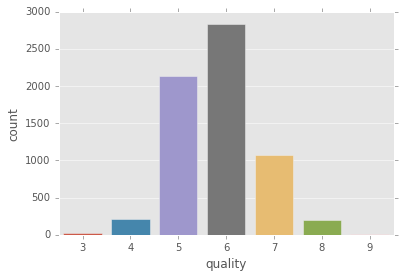

In [113]:
style.use('ggplot')
sns.countplot(wine['quality'])

The distrubtion of the quality of wine is approximately guassian distrubted with the most wines being averagely rated with few exceptional and terrible wines

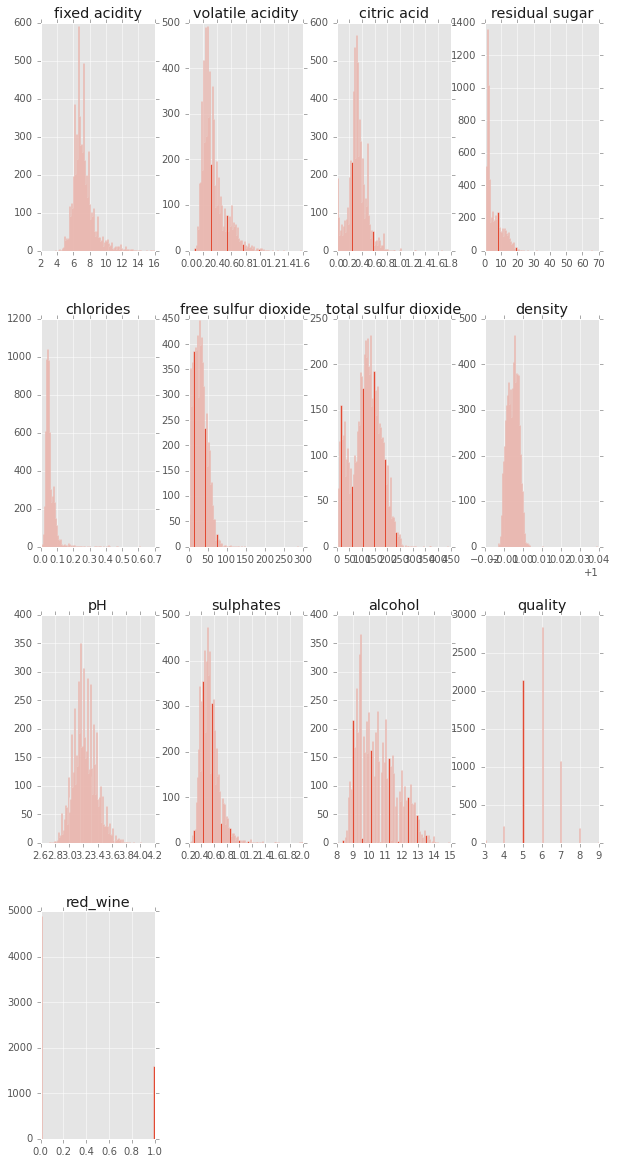

In [114]:
wine.hist(bins = 100, figsize = (10, 20))
plt.show()

Analysing these graphs you can see most graphs are noramlly distrubted, some graphs right skewed meaning most values are at the low end and then some values are spread out in the higher values. Total sulfure dioxide is bimodal so there would be two main groups.

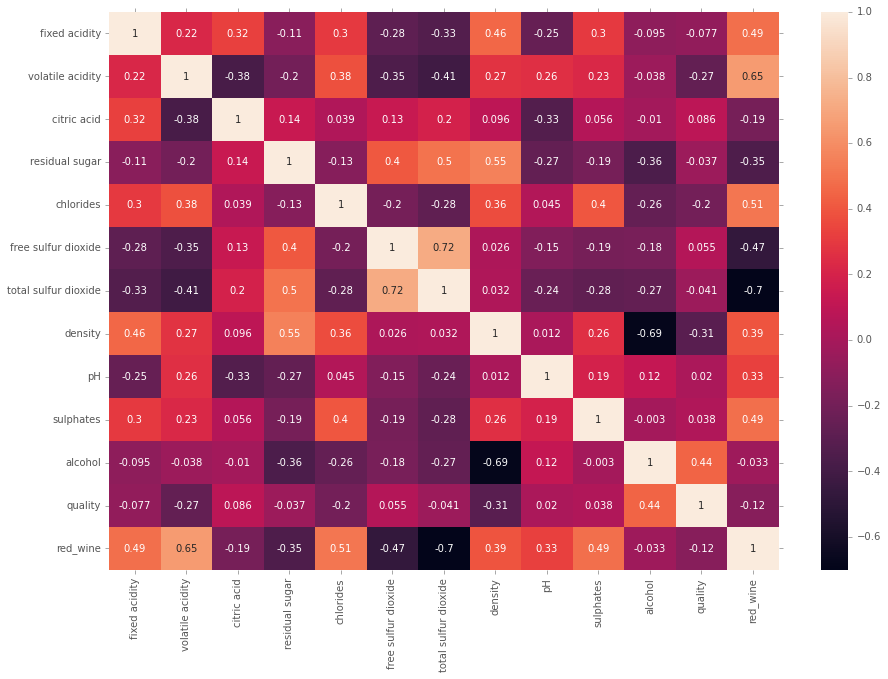

In [115]:
plt.figure(figsize = (15,10))
corr = wine.corr()
sns.heatmap(corr, annot = True)
plt.savefig('Correlation Matrix.png')
plt.show()

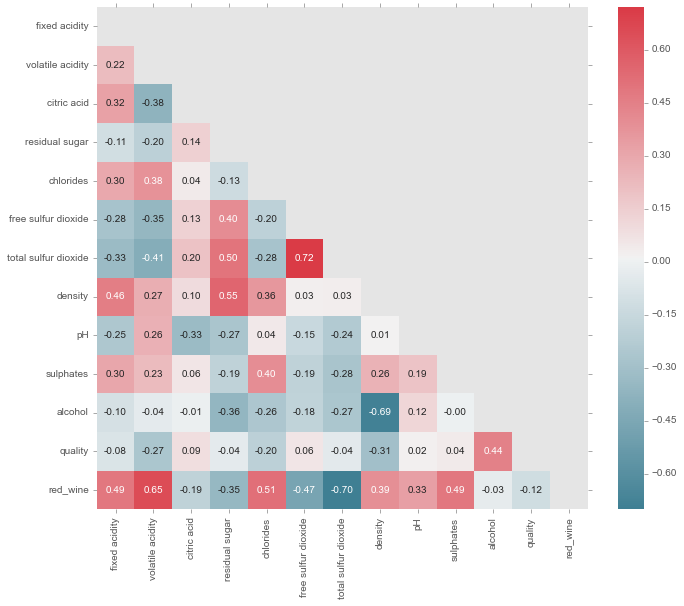

In [116]:
corr_list = corr.quality.abs().sort_values(ascending=False).index[0:]

plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

looks like the alcohol quantity is the most correleated towards the quality of the wine.

### Cleaning data

In [117]:
#Seperating data into the two wine groups
whitewine_csv = wine[wine['red_wine'] == 0]
redwine_csv = wine[wine['red_wine'] == 1]

In [118]:
a = redwine_csv.corr()
a['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
red_wine                     NaN
Name: quality, dtype: float64

In [119]:
b = whitewine_csv.corr()
b['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
red_wine                     NaN
Name: quality, dtype: float64

looks like red wine's quality has a greater correlation with alcohol content. From the tables above you can see that there are very different correlated attributes towards each wine group. White wine has denisty as its second biggest correlated attribute with the thicker the wine, the worse quality. Whereas red wine has volatile acidity as its second most correlated but also being inversely correlated. It also looks like both wines quality has minimal effects with its residual sugar, free sulfur dioxide and pH, 

## Normalize the Data

Normalizing each attribute of the data means we have a standard deviation of 1, this means spread of the attribute is 1 unit away from its mean. Doing this takes only the direction of the attribute and not its magnitude, but keeps its comparitive magnitude against other normalized attributes. We do this so each attribute has equal weight to the trend and we only focus on its overall contribution.

In [120]:
def normalise_data(df):
    df_new = pd.DataFrame()
    for col in df.columns:
        mean = np.mean(df[col])
        std = np.std(df[col])
        df_new[col] = (df[col] - mean) / std
    return df_new

This section we are only choosing one indicator variable which will be alcohol as it has the greatest correlation. I will also choose the redwine subset as it also has the greatest correlation number compared to white wine and combined datasets.

## Univariant Regression Model

In [121]:
#Splitting into target variable and predictor variable
predictor = pd.DataFrame(redwine_csv['alcohol'])
X = normalise_data(predictor).values.reshape(-1,1)
y = redwine_csv['quality'].values.reshape(-1,1)
#Splitting into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
type(y_test)

numpy.ndarray

In [123]:
np.shape(y_train)

(1119, 1)

In [124]:
np.shape(X_train)

(1119, 1)

In [125]:
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

#Using linear regression model to predict y values
pred = linreg.predict(X_test)
predicted = np.array(pred)

# Calculate the score (R^2 for Regression) for predicted values
a = (r2_score(y_test, predicted, multioutput='variance_weighted'))
print('Models r2 score is:', a)

#getting the mean squared error
b = (mean_squared_error(y_test, predicted ))
print('Models mean square error:', b )

Models r2 score is: 0.18535810854402757
Models mean square error: 0.5165020523524175


The r2 score indicates the amount of variance the target variable (quality) has that can be explained by the predictor variable (alcohol) as a percentage. It does this by calculating the variance due to our predictor variable divided by the total variance. So it tells us the strength of the relationship between our target and predictor variables. 

NB: Variance is the square of the standard deviation so the square of the difference in the datapoints are from the mean of its expected value

Variance and mean square error are tightly related however the mean square error is the average of the squared distance from its expected value 

In [126]:
np.shape(predicted)

(480, 1)

In [127]:
np.shape(y_test)

(480, 1)

In [128]:
#comment_muru sounds good!

In [129]:
print('The linear regression coeffienct is:', float(linreg.coef_))

The linear regression coeffienct is: 0.4016231736139674


The positive regression coeffient tells us that alcohol and quality are positively correlated. In our case our regression coeffient means that for one increased unit of alcohol the mean of the quality increases by 0.5149 units while holding other variables constant

In [130]:
print("the intercept is :", float(linreg.intercept_))

the intercept is : 5.624112492412067


This indicates the y intercept, so the predicted line equation would be y = intercept + (regression coeffient)x or           y = -0.1928+ 0.5149x

## All variables

In [131]:
models = {}

In [132]:
wine_csv = normalise_data(wine)
tr, te = train_test_split(wine_csv, test_size=0.25, random_state=83)

In [133]:
#getting all predictor features we will test
all_features = wine_csv.drop(columns = ['quality', 'red_wine'])
names = all_features.columns
quantitative_features = []
for i in range(len(names)):
    quantitative_features.append(names[i])
quantitative_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [134]:
for i in range(len(quantitative_features)):
    # The features to include in the ith model
    features = quantitative_features[:(i+1)]
    # The name we are giving to the ith model
    name = ",".join([str(i+1)])
    # The pipeline for the ith model
    model = Pipeline([
        ("SelectColumns", ColumnTransformer([
            ("keep", "passthrough", features),
        ])),
        ("LinearModel", LinearRegression())
    ])
    # Fit the pipeline
    model.fit(tr, tr['quality']);
    # Saving the ith model
    models[name] = model

In [135]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))

In [136]:
def compare_models(models):
    # Compute the training error for each model
    training_rmse = [rmse_score(model, tr, tr['quality']) for model in models.values()]
    # Compute the cross validation error for each model
    validation_rmse = [np.mean(cross_val_score(model, tr, tr['quality'], scoring=rmse_score, cv=5)) 
                       for model in models.values()]
    # Compute the test error for each model (don't do this!)
    test_rmse = [rmse_score(model, te, te['quality']) for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        go.Bar(x = names, y = training_rmse, name="Training RMSE"),
        go.Bar(x = names, y = validation_rmse, name="CV RMSE"),
        go.Bar(x = names, y = test_rmse, name="Test RMSE", opacity=.3)])
    fig.update_xaxes(title="Number of Variables")
    fig.update_yaxes(title="RMSE")
    return fig

In [137]:
compare_models(models)

In [138]:
#key relating number of variable to which variable is used
skey = pd.DataFrame(quantitative_features, columns = ['Vairable Name'])
skey.index += 1
skey

,Vairable Name
1,fixed acidity
2,volatile acidity
3,citric acid
4,residual sugar
5,chlorides
6,free sulfur dioxide
7,total sulfur dioxide
8,density
9,pH
10,sulphates


From the above graph I have chosen my metric to be the root mean square error, this is because it is considered an excellent general purpose error metric. The RMSE takes the square root of the mean of the square of all of the errors.

Like all errors the smaller the error the better the model is to predict, so from the graph you can see the higher the number of variables used, the lower the error becomes which is to be expected.

However you can also see that the decrease in the errors are not linear with the number of variables and each variable decreases the error by a unique amount

Typically the training error will be smaller than the cross validation and testing error as we have optimized the model to minimize the training error and acts as an underestimate of the CV and test error. The main error which we should focus on is the CV error.

An increasing CV RSME indicates that the model is either being underfitted or overfitted meaning that the model is not taking in the optimal amount of information from the training data set and is either becoming to specific to the training data, or is becoming to general.

Including the test RMSE shouldnt be done in normal practice as it creates bias for us as the models creator. It can be compared to looking at practice tests before an exam, this skews your results towards doing better but not nescessaryly knowing the concepts which are tested better 

## Monovariable K Fold Cross Validation

Cross validation is the process of splitting the total data into different groups, a training set and a testing set. The training set is used to train the machine learning algorithm, then the algorithm is tested on a new set of data (testing set) which it hasnt seen before and can see if the models predictions are accurate to the general trend of the data and not just the specific training data.

There are several ways and orders in which to split the data into the training set and testing set

the K fold method works by splitting the data into K sections (in our case 5). It takes 4 out of the 5 sections as a training set and compares it against the left over section as a testing set. It then alternates which 4 sections are chosen as the training set and sees which sets would make for the best training and testing set.

In [139]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
#setting up variables so iloc works
x = pd.DataFrame(wine_csv[quantitative_features])
Y = pd.DataFrame(y, columns = ['quality'])
lr = linear_model.LinearRegression()
train_scores = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = x.iloc[train, ]
    y_train = Y.iloc[train, ]
    X_test = x.iloc[test, ]
    y_test = Y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    test_preds = lr.predict(X_test) 
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))

    # Mean squared error of predicted vs actual
    test_rmse.append(mean_squared_error(y_test, test_preds, squared = False))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                          'Test R2': test_scores,
                          'Test RMSE': test_rmse},
                         index = [i+1 for i in range(5)])
metrics_df

,Training R2,Test R2,Test RMSE
1,0.374765,0.266113,0.669917
2,0.352022,0.391364,0.623492
3,0.357750,0.356522,0.673532
4,0.360961,0.355867,0.623650
5,0.363659,0.339698,0.670798


In [140]:
np.average(metrics_df['Training R2'])

0.36183145529838223

## Ridge Regression

When we add more and more parameters to our model, we also add to its complexitiy. Doing this makes our model more and more accurate as its using more information on the dataset. However it also makes it more and more specific to the parameters weve exposed it to and we run into a problem of overfitting. Over fitting is when our model bases itself too tightly to the training data set and not to the general trend of qualities we are testing, it then performs worst when exposed to a different dataset.
Our goal is to reach a sweet inbetween spot, to extract as much information from our training data without becoming overly specific to that data. Regularization is a tool to find the middle ground.
We have a regularization parameter which works as a dial which we can tune the amount of complexity in which we use to fit the model. Adjusting this dial we can then stumble across the perfect balance between complexity and specificity to avoid overfitting.
There are two types of regularization:
Ridge Regression (L2) : Adds an extra term onto the model (alpha * the slope of the line squared) where alpha is an arbitary constant and the slope squared can be thought of as a penalty term  

Linear regression model is caluclated to find a line through the data which has the smallest sum of squared residuals between all datapoints. It is comprised of a y intercept and a slope term

In [142]:
ridge_model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", quantitative_features),
    ])),
    ("LinearModel", Ridge(alpha=0.5))
])

In [143]:
ridge_model.fit(tr, tr['quality'])
models["Ridge(alpha=0.5)"] = ridge_model
compare_models(models)

### Now to find the most optimal alpha value

In [144]:
#comment_muru: you can use sklearn's RidgeCV function.
alphas = np.linspace(0.5, 20, 50)
cv_values = []
train_values = []
test_values = []
for alpha in alphas:
    ridge_model.set_params(LinearModel__alpha=alpha)
    cv_values.append(np.mean(cross_val_score(ridge_model, tr, tr['quality'], scoring=rmse_score, cv=5)))
    ridge_model.fit(tr, tr['quality'])
    train_values.append(rmse_score(ridge_model, tr, tr['quality']))
    test_values.append(rmse_score(ridge_model, te, te['quality']))

In [145]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = alphas, y = train_values, mode="lines+markers", name="Train"))
fig.add_trace(go.Scatter(x = alphas, y = cv_values, mode="lines+markers", name="CV"))
fig.add_trace(go.Scatter(x = alphas, y = test_values, mode="lines+markers", name="Test"))
fig.update_layout(xaxis_title=r"$\alpha$", yaxis_title="CV RMSE")

Can see not much change with differing alphas but looks like a slight downward trend with the higher alpha. This would symbolize that our first regression line is quite accurate towards the model and adding a the penalty term doesnt add much to its accuracy

### Finding the Optimal Alpha

In [146]:
best_alpha = alphas[np.argmin(cv_values)]
ridge_model.set_params(LinearModel__alpha=best_alpha)
ridge_model.fit(tr, tr['quality'])
models["Ridge(alpha_best)"] = ridge_model
compare_models(models)

### Ridge CV

In [147]:
alphas = np.linspace(0.5, 3, 30)

ridge_model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", StandardScaler(), quantitative_features)
    ])),
    ("LinearModel", RidgeCV(alphas=alphas))
])

ridge_model.fit(tr, tr['quality'])
models["RidgeCV"] = ridge_model
compare_models(models)

We use the ridgeCv value which will do cross validation but in order to calculate the red bar our plotting code actually calls the whole pipeline inside a cross validation loop. So at some point in the ridgeCV cross validation loop will run another cross validation loop  to choose the best alpha for each of the cross validation splits.

## Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

https://www.statisticshowto.com/lasso-regression/

In [148]:
lasso_model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", StandardScaler(), quantitative_features)
    ])),
    ("LinearModel", LassoCV(cv=3))
])

In [149]:
lasso_model.fit(tr, tr['quality'])
models["LassoCV"] = lasso_model
compare_models(models)

We can examine the distribution of model coefficients to see that Lasso is selecting only a few of the features to use in it's predictions:

We can expect that the Lasso model will have some variables coeffient as 0 and the Ridge model variables with small coeffients.  

In [150]:
ff.create_distplot([
    models['LassoCV']["LinearModel"].coef_, 
    models['RidgeCV']["LinearModel"].coef_],
    ["Lasso", "Ridge"], bin_size=0.1)

From this graph we can see the Lasso modelconcentrated about the 0, and the ridge concentrated around the 0.1 just as we expected. However the peak is not very high in the Lasso model which indicated most of our variables do actually contribute to the variance in the quality of the wine 

# Logistic 

We are converting our target variable to a binary classification of either being good or bad 
Because our target variable is now a binary classification, it has only two points. Taking a straight line between the middle of the two points wouldnt make for a very accurate model of the behaviour of the two outcomes.

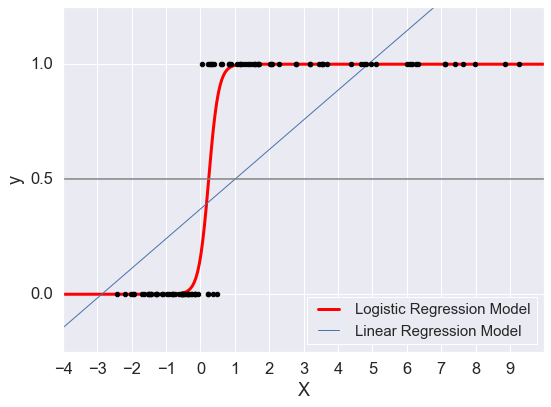

In [151]:
# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    ("Logistic Regression Model", "Linear Regression Model"),
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

From the above graph you can clearly see the difference in the models and why logisitic models are used for binary classification.
To accurately determine whether or not the variable y is 0 or 1, the linear model will determine if X is greater than 1, than y = 1 or if x if less than 1, than y= 0. looking at the data points this is inaccurate for the case of y =1, compare this to the logitistic model. the logtisitc model says if X is greater than 0 than y = 1 which is a much more accurate prediction

In [152]:
#changing the data to binary classification
summ = []
for i in range(len(wine_csv)):
    if wine['quality'][i] > 5:
        summ.append("good")
    else:
        summ.append("bad")
wine_csv['qual'] = summ
wine_csv

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,qual
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.750190,bad
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,1.750190,bad
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,1.750190,bad
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,1.750190,good
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.750190,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0.207999,-0.571367,good
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,-0.937230,-0.571367,bad
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0.207999,-0.571367,good
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,1.353228,-0.571367,good


In [153]:
wine_csv['qual'].value_counts()

good    4113
bad     2384
Name: qual, dtype: int64

In [154]:
Y = wine_csv['qual']
x = wine_csv.drop(['quality', 'qual'], axis=1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [156]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 73.18%


Accuracy is the proportion of correct predictions over total predictions
This means that our model gets if a wine is good or bad 73.18% of the time 

In [157]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

         bad       0.63      0.58      0.60       691
        good       0.78      0.82      0.80      1259

    accuracy                           0.73      1950
   macro avg       0.71      0.70      0.70      1950
weighted avg       0.73      0.73      0.73      1950



Precision measures how good our model is when the prediction is positive, so how many predicited good wines were actually good. High precision relates to the low false positive rate

Recall measures how good our model is at correctly predicting positive classes, so from all the truely good wines how many did we predict, above 0.5 is good

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account

TN:  398
FN:  230
TP:  1029
FP:  293


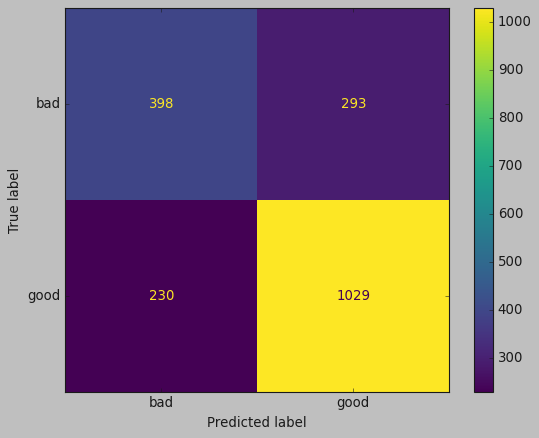

In [158]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm

From our confusion matrix we can see that the model is very good at calling true postive values, however is not as great as predicting true negative values.

In [159]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 76.62%


In [160]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

         bad       0.67      0.68      0.67       691
        good       0.82      0.81      0.82      1259

    accuracy                           0.77      1950
   macro avg       0.74      0.75      0.75      1950
weighted avg       0.77      0.77      0.77      1950



TN:  471
FN:  236
TP:  1023
FP:  220


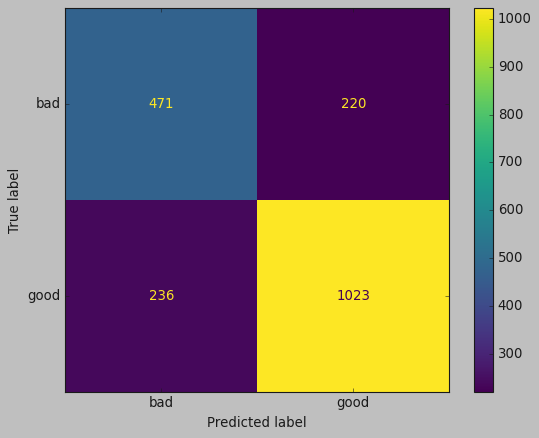

In [161]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

As you can see using the DecisionTreeClassifier as the logistic model the right predictions have increased drastically.

Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two

The ROC curve will summarise the prediction performance of a classification model at all classification thresholds. As a funciton of the true postitive rate and false positive rate. Where the true positive rate will be on the y axis and the false positive rate will be on the x axis.

Using the graph we can see the optimal classification threshold to choose, which will give us the best true and false postitve rate for our situation. In our case of wines, and true and false positive case have the same severity, meaning we are just as happy prediciting a good wine correctly as a bad wine. In some scenarios a true postitive is much more important than a true negative, an example could be detecting Ebola where we would have our classification threshold more skewed towards the y axis (true positive rate)

True postive is also known as the sensetivity and the false postiive rate is also known as specificity 

In [162]:
label = LabelEncoder()

In [163]:
wine_csv['qual'] = label.fit_transform(wine_csv['qual'])

In [164]:
label.classes_

array(['bad', 'good'], dtype=object)

In [165]:
X = wine_csv.drop(['quality', 'qual', 'red_wine'],axis=1)
y = wine_csv.qual

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38,stratify=y)

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, quantitative_features)])
        
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforest', RandomForestClassifier(max_depth=15))])


# fit the pipeline to train a random forest classifier model on the training set

rfc = pipeline.fit(X_train, (y_train))

predictions = rfc.predict(X_test)

In [167]:
def draw_roc_curve(y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)
    plt.subplots(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Random Forest Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest Classifier ROC Curve')
    plt.show();

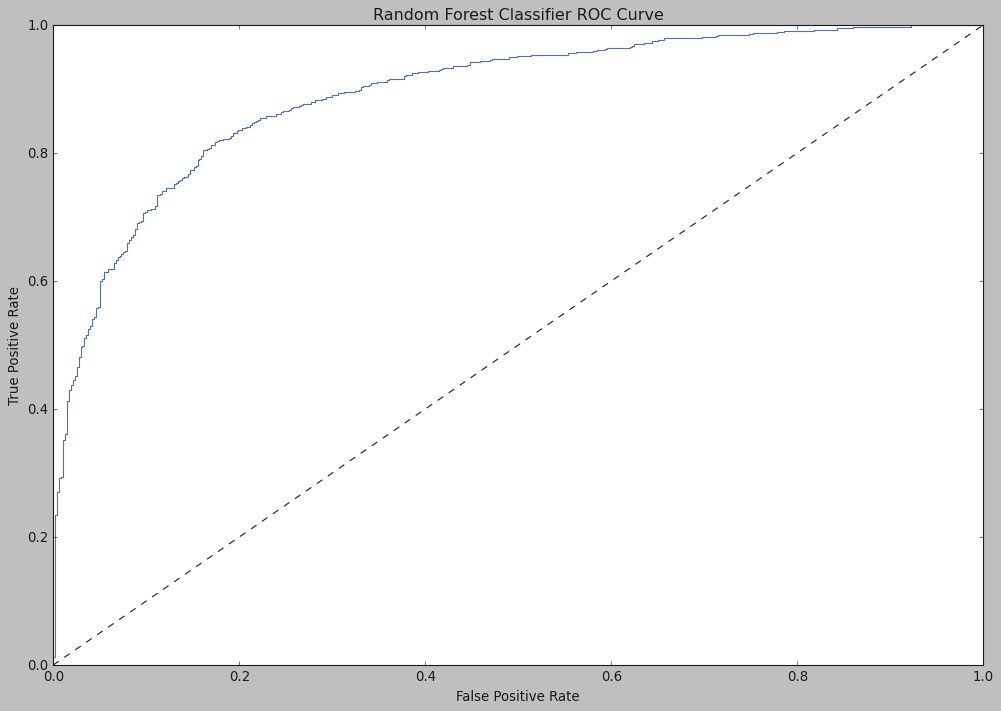

In [168]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
draw_roc_curve(y_pred_prob)

I couldve made my model better by cleaning the data better. The possible techniques i could have used is cleaning the data using z score. The z score is a standard deviation, where any data points in normally distrubted data that are 3 standard deviations away from the mean is considered an outlier.

I also couldve seperated the data into the two types of wine, the red wine and white wine. This wouldve imporved the model because at the start we saw that both models had different variables with different correlated values.